In [134]:
#%% Importing modules and data
import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import os
import quandl
import seaborn as sns
import matplotlib.dates as dates
import matplotlib.ticker as ticker
from pandas_datareader import data
from sklearn.preprocessing import StandardScaler

%matplotlib inline

def save_xls(list_dfs, xls_path,sheet_names):
    writer = ExcelWriter(xls_path)
    for n, df in enumerate(list_dfs):
        df.to_excel(writer, sheet_names[n])
    writer.save()
    return

In [213]:
### Collecting data

spx = pd.read_csv('SPX.csv')
spx['Date'] = pd.to_datetime(spx['Date'])
spx = spx.set_index(['Date'])
spx = spx[['Close']]
spx.columns = ['spx']

# Economic data from Quandl

#unemployment_rate = quandl.get("FRED/NROUST", authtoken="-ZxrLoLy3vKgLtLraaMn")
#total_fed_debt = quandl.get("FRED/GFDEBTN", authtoken="-ZxrLoLy3vKgLtLraaMn")
#fed_debt_public_held = quandl.get("FRED/FYGFDPUN", authtoken="-ZxrLoLy3vKgLtLraaMn")
#public_debt_to_gdp = quandl.get("FRED/GFDEGDQ188S", authtoken="-ZxrLoLy3vKgLtLraaMn")
#household_debt_to_gdp = quandl.get("FRED/HDTGPDUSQ163N", authtoken="-ZxrLoLy3vKgLtLraaMn")
#industrial_production_final = quandl.get("FRED/IPB50002NQ", authtoken="-ZxrLoLy3vKgLtLraaMn")


# Investing for a Living 6 macro factors
civ_unemployment_rate = quandl.get("FRED/UNRATE", authtoken="-ZxrLoLy3vKgLtLraaMn")
civ_unemployment_rate.columns = ['civ_unemployment_rate']

real_retail_and_services = quandl.get("FRED/RRSFS", authtoken="-ZxrLoLy3vKgLtLraaMn")
real_retail_and_services.columns = ['real_retail_and_services']

industrial_production_consumer_goods = quandl.get("FRED/IPDCONGD", authtoken="-ZxrLoLy3vKgLtLraaMn")
industrial_production_consumer_goods.columns = ['industrial_production_consumer_goods']

new_housing = quandl.get("FRED/PERMIT", authtoken="-ZxrLoLy3vKgLtLraaMn")
new_housing.columns = ['new_housing']

yield_spread = quandl.get("FRED/T10Y3MM", authtoken="-ZxrLoLy3vKgLtLraaMn")
yield_spread.columns = ['yield_spread']

national_fin_conditions = quandl.get("FRED/NFCILEVERAGE", authtoken="-ZxrLoLy3vKgLtLraaMn")
national_fin_conditions.columns = ['national_fin_conditions']
national_fin_conditions['Date'] = 0

curr_month = 0
for index, row in national_fin_conditions.iterrows():
    if index.month == curr_month:
        national_fin_conditions.drop(index, inplace=True)
    else:
        curr_year = index.year
        curr_month = index.month
        national_fin_conditions.ix[index, 1] = dt.datetime(curr_year, curr_month, 1)
    curr_month = index.month
national_fin_conditions['Date'] = pd.to_datetime(national_fin_conditions['Date'])
national_fin_conditions = national_fin_conditions.set_index(['Date'])

df = pd.concat([spx, civ_unemployment_rate, real_retail_and_services,
               industrial_production_consumer_goods, new_housing,
               yield_spread, national_fin_conditions], axis = 1).dropna()

C:\Users\Fang\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [174]:
# Scaling Data
sc_function = StandardScaler()
df_scaled = sc_function.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled = df_scaled.set_index(df.index)
df_scaled.columns = df.columns

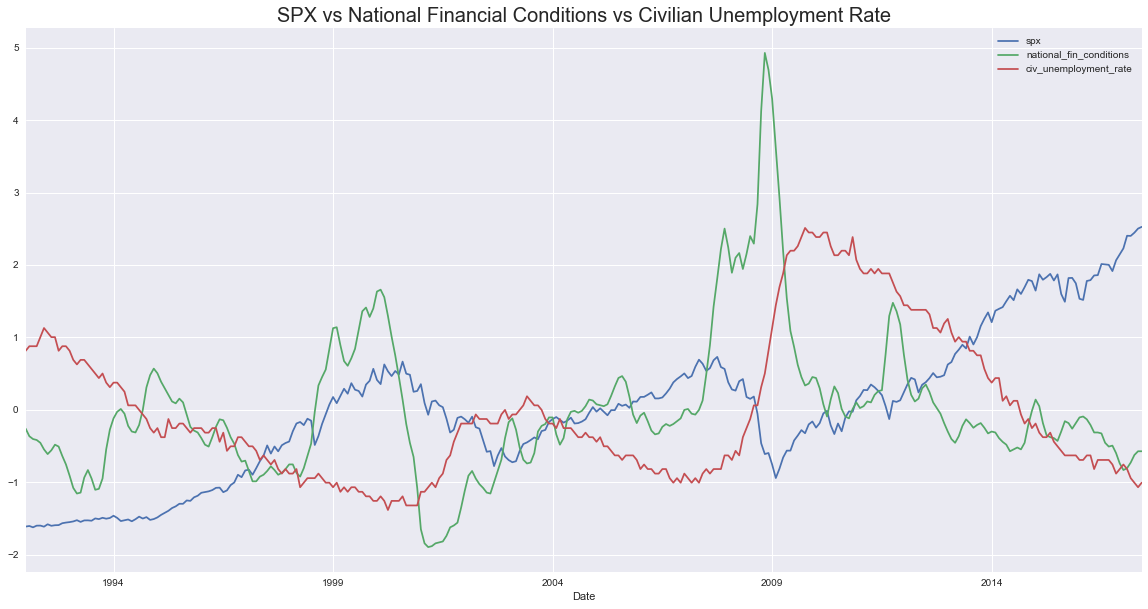

In [175]:
df_scaled[['spx','national_fin_conditions','civ_unemployment_rate']].plot(figsize = (20,10))
plt.title('SPX vs National Financial Conditions vs Civilian Unemployment Rate', fontsize = 20)

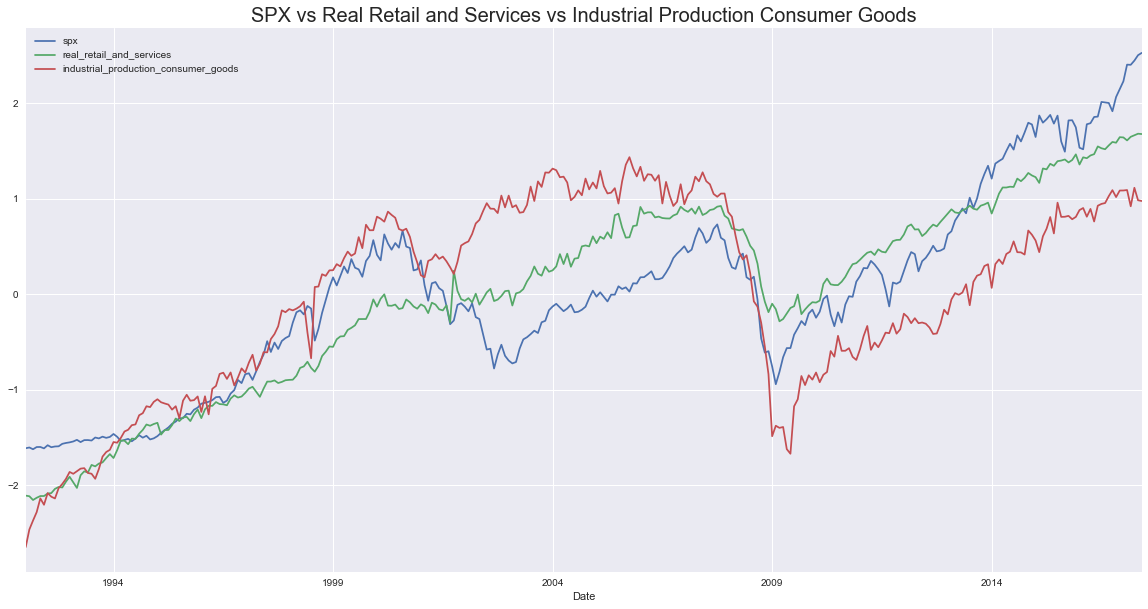

In [179]:
df_scaled[['spx','real_retail_and_services','industrial_production_consumer_goods']].plot(figsize = (20,10))
plt.title('SPX vs Real Retail and Services vs Industrial Production Consumer Goods', fontsize = 20)

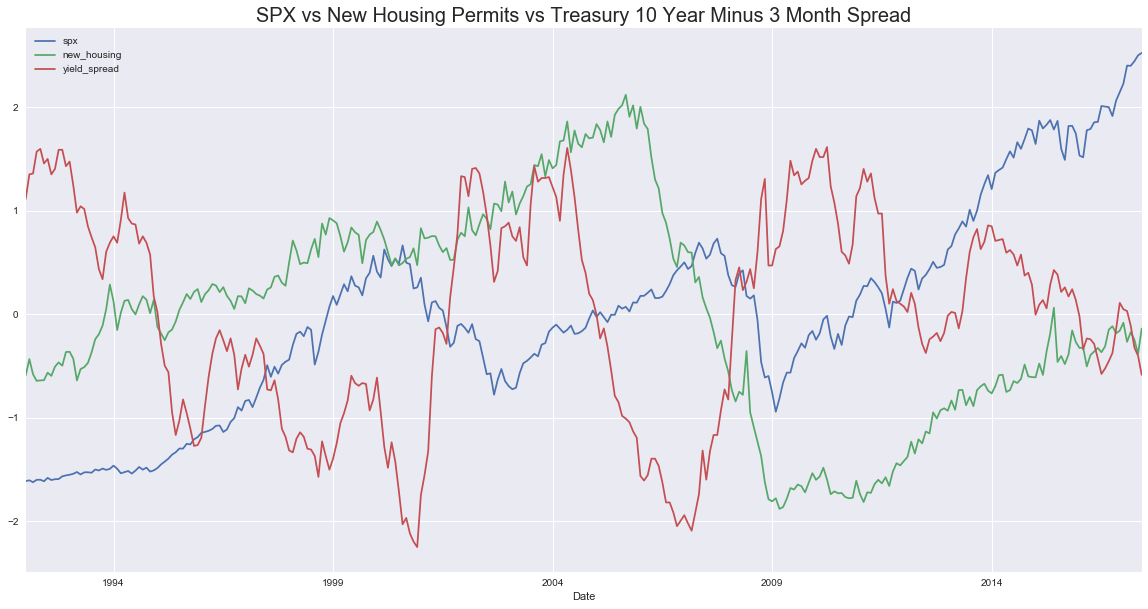

In [180]:
df_scaled[['spx','new_housing','yield_spread']].plot(figsize = (20,10))
plt.title('SPX vs New Housing Permits vs Treasury 10 Year Minus 3 Month Spread', fontsize = 20)

In [177]:
df[['spx_returns','civ_unemployment_rate', 'real_retail_and_services',
   'industrial_production_consumer_goods', 'new_housing',
   'yield_spread', 'national_fin_conditions']].corr()

,spx_returns,civ_unemployment_rate,real_retail_and_services,industrial_production_consumer_goods,new_housing,yield_spread,national_fin_conditions
spx_returns,1.000000,0.055725,-0.050440,-0.061170,-0.006401,-0.051265,-0.079598
civ_unemployment_rate,0.055725,1.000000,-0.098984,-0.544278,-0.736025,0.678365,0.149931
real_retail_and_services,-0.050440,-0.098984,1.000000,0.784080,-0.034904,-0.149349,0.136986
industrial_production_consumer_goods,-0.061170,-0.544278,0.784080,1.000000,0.530897,-0.369539,-0.001047
new_housing,-0.006401,-0.736025,-0.034904,0.530897,1.000000,-0.384381,-0.318593
yield_spread,-0.051265,0.678365,-0.149349,-0.369539,-0.384381,1.000000,-0.018037
national_fin_conditions,-0.079598,0.149931,0.136986,-0.001047,-0.318593,-0.018037,1.000000


In [217]:
test_df = df.pct_change().dropna()

In [218]:
test_df.corr()

,spx,civ_unemployment_rate,real_retail_and_services,industrial_production_consumer_goods,new_housing,yield_spread,national_fin_conditions
spx,1.000000,-0.094407,0.210107,0.024831,0.100356,0.025209,-0.063781
civ_unemployment_rate,-0.094407,1.000000,-0.042411,-0.135382,-0.085623,-0.019522,0.050072
real_retail_and_services,0.210107,-0.042411,1.000000,0.055928,0.230440,0.038071,0.022367
industrial_production_consumer_goods,0.024831,-0.135382,0.055928,1.000000,0.083290,-0.053635,-0.014135
new_housing,0.100356,-0.085623,0.230440,0.083290,1.000000,0.040434,-0.020241
yield_spread,0.025209,-0.019522,0.038071,-0.053635,0.040434,1.000000,0.024132
national_fin_conditions,-0.063781,0.050072,0.022367,-0.014135,-0.020241,0.024132,1.000000


In [219]:
df.to_csv('macro.csv')

In [ ]:
'''
unemployment rate >= 5
yield spreads > 1.5 or 2
financial conditions leverage >= 1.5


'''